Problem 1 (c)

In [1]:
!pip install scikit-learn scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

In [3]:
ds = fetch_openml('mnist_784', as_frame=False)
x, x_test, y, y_test = train_test_split(ds.data, ds.target, test_size=0.2, random_state=42)

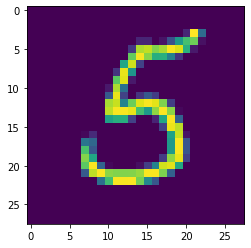

In [4]:
import matplotlib.pyplot as plt
a = x[0].reshape((28, 28))
plt.imshow(a)

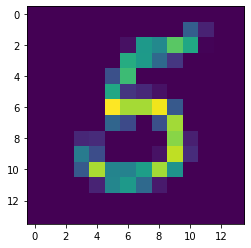

In [5]:
import cv2
b = cv2.resize(a, (14, 14))
plt.imshow(b)

In [6]:
from random import sample
idx = sample(list(range(len(x))), 1000)
x_sub = x[idx]
y_sub = y[idx]

(d)

In [7]:
x_train, x_val, y_train, y_val = train_test_split(x_sub, y_sub, test_size=0.2, random_state=42)

In [8]:
clf = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
clf.fit(x_train, y_train)
val_pred = clf.predict(x_val)
print("classification error on the validation data: ", 1-accuracy_score(y_val, val_pred))

classification error on the validation data:  0.865


In [9]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        19
           6       0.14      1.00      0.24        27
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00        10

    accuracy                           0.14       200
   macro avg       0.01      0.10      0.02       200
weighted avg       0.02      0.14      0.03       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Ratio of the number of support samples to the total number
ratio = len(clf.support_)/len(x_train)
print(ratio)

1.0


In [11]:
print(confusion_matrix(y_val,val_pred))

[[ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0  0 25  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]]


In [12]:
import collections
counter = collections.Counter(y_train)
print(counter)

Counter({'6': 99, '1': 94, '4': 87, '3': 84, '8': 80, '0': 75, '2': 74, '7': 73, '9': 71, '5': 63})


In [13]:
# test data
test_pred = clf.predict(x_test)
print("classification error of test data: ", 1-accuracy_score(y_test,test_pred))

classification error of test data:  0.9002857142857142


In [14]:
print(classification_report(y_test, test_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.00      0.00      0.00      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.10      1.00      0.18      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.10     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.10      0.02     14000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
labels = [str(i) for i in range(9)]
test_cm = confusion_matrix(y_test,test_pred,labels=labels)
print(test_cm)

[[   0    0    0    0    0    0 1343    0    0]
 [   0    0    0    0    0    0 1600    0    0]
 [   0    0    0    0    0    0 1380    0    0]
 [   0    0    0    0    0    0 1433    0    0]
 [   0    0    0    0    0    0 1295    0    0]
 [   0    0    0    0    0    0 1273    0    0]
 [   0    0    0    0    0    0 1396    0    0]
 [   0    0    0    0    0    0 1503    0    0]
 [   0    0    0    0    0    0 1357    0    0]]


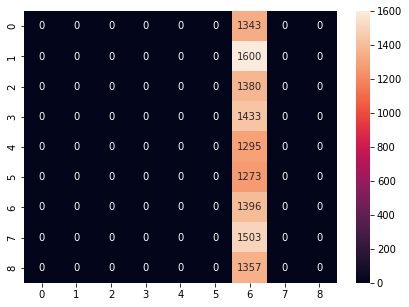

In [16]:
import seaborn as sns
fig = plt.figure()
fig.set_size_inches(7,5)
ax = sns.heatmap(test_cm, annot=True, fmt='g')
fig.savefig('ConfusionMatrixTestData(prob1_d).pdf')

(g)

In [17]:
from sklearn.model_selection import GridSearchCV
# Define parameters and use grid search cross validation to find 
# the best set of paramter for random forest classifier
params = {
    "C": [0.001, 0.1, 1.0, 10, 100, 1000],
    "kernel":['rbf'],
    "gamma":['scale', 'auto']
}
svm_gs = GridSearchCV(estimator=svm.SVC(), param_grid=params, cv=5, return_train_score=True).fit(x_train, y_train)


In [18]:
results_df = pd.DataFrame(svm_gs.cv_results_)[['param_C','param_gamma','param_kernel','mean_test_score']]
results_df

,param_C,param_gamma,param_kernel,mean_test_score
0,0.001,scale,rbf,0.12375
1,0.001,auto,rbf,0.12375
2,0.1,scale,rbf,0.61500
3,0.1,auto,rbf,0.12375
4,1.0,scale,rbf,0.89250
5,1.0,auto,rbf,0.12375
6,10,scale,rbf,0.90125
7,10,auto,rbf,0.12375
8,100,scale,rbf,0.90125
9,100,auto,rbf,0.12375


In [19]:
print("The best parameters are {}".format(svm_gs.best_params_))
print("The mean validation accuracy of the best parameters is {}".format(svm_gs.best_score_))

The best parameters are {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
The mean validation accuracy of the best parameters is 0.9012499999999999


(h)

In [20]:
# sample
# 100 samples for each class
train_idx = []
val_idx = []
for i in range(10):
  y_i = [e for e in range(len(y)) if y[e]==str(i)]
  y_i_idx = sample(y_i, 200)
  train_idx.extend(y_i_idx[:100])
  val_idx.extend(y_i_idx[100:])

x_train = x[train_idx]
x_val = x[val_idx]
y_train = y[train_idx]
y_val = y[val_idx]

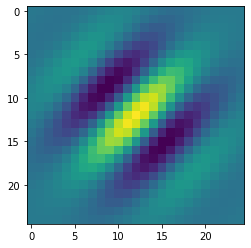

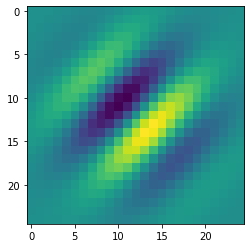

In [21]:
from skimage.filters import gabor_kernel, gabor
import numpy as np 

freq, theta, bandwidth = 0.1, np.pi/4, 1
gk = gabor_kernel(frequency=freq, theta=theta, bandwidth=bandwidth)
plt.figure(1); plt.clf(); plt.imshow(gk.real)
plt.figure(2); plt.clf(); plt.imshow(gk.imag)

train_coeff_real = []
val_coeff_real = []
for i in range(len(x_train)):
  a_train = x_train[i].reshape((28,28))
  a_val = x_val[i].reshape((28,28))
  image_train = cv2.resize(a_train, (14, 14))
  image_val = cv2.resize(a_val, (14,14))
  train_coeff_real_i , _ = gabor(image_train, frequency=freq, theta=theta,
  bandwidth=bandwidth)
  train_coeff_real.append(train_coeff_real_i.flatten())

  val_coeff_real_i , _ = gabor(image_val, frequency=freq, theta=theta,
  bandwidth=bandwidth)
  val_coeff_real.append(val_coeff_real_i.flatten())
train_coeff_real = np.array(train_coeff_real)
val_coeff_real = np.array(val_coeff_real)
#plt.figure(1); plt.clf(); plt.imshow(coeff_real)

In [22]:
clf_gab = svm.SVC(C=10, kernel='rbf', gamma='scale')
clf_gab.fit(train_coeff_real, y_train)
train_pred = clf_gab.predict(train_coeff_real)
val_pred = clf_gab.predict(val_coeff_real)
print("classification accuracy on the training data: ", accuracy_score(y_train, train_pred))
print("classification accuracy on the validation data: ", accuracy_score(y_val, val_pred))

classification accuracy on the training data:  0.77
classification accuracy on the validation data:  0.705


(j)

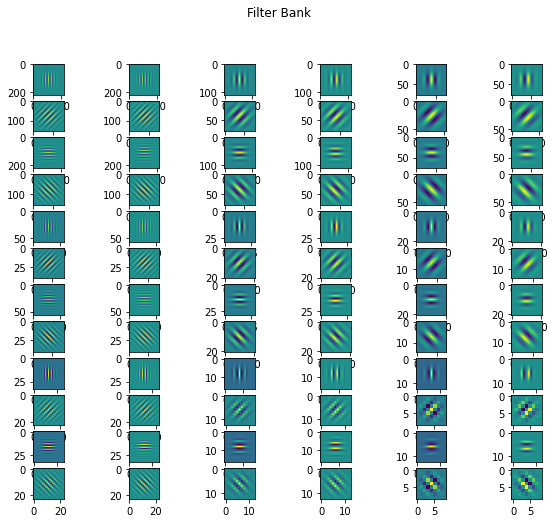

In [23]:
theta = np.arange(0,np.pi,np.pi/4)
frequency = np.arange(0.05,0.5,0.15)
bandwidth = np.arange(0.3,1,0.3)
fig1 = plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.2)
plt.suptitle("Filter Bank")

i = 1
for f in frequency:
  for t in theta:
    for b in bandwidth:
      gk = gabor_kernel(frequency=f, theta=t, bandwidth=b)
      plt.subplot(12, 6, i)
      plt.imshow(gk.real)
      plt.subplot(12, 6, i+1)
      plt.imshow(gk.imag)
      #plt.figure(); plt.clf(); plt.imshow(gk.real)
      #plt.figure(); plt.clf(); plt.imshow(gk.imag)

      i += 2
plt.show()
fig1.savefig('FilterBank.pdf')

      #image = x_train[0].reshape((28,28))
      #image = cv2.resize(image, (14,14))
      #coeff_real , _ = gabor(image, frequency=f, theta=t,
      #bandwidth=b)

      #plt.figure(); plt.clf(); plt.imshow(coeff_real)

In [24]:
train_coeff_real = []
val_coeff_real = []
for i in range(len(x_train)):
  train_coeff_real_i = []
  val_coeff_real_i = []
  a_train = x_train[i].reshape((28,28))
  a_val = x_val[i].reshape((28,28))
  image_train = cv2.resize(a_train, (14, 14))
  image_val = cv2.resize(a_val, (14,14))
  for f in frequency:
    for t in theta:
      for b in bandwidth:
        train_coeff_real_ , _ = gabor(image_train, frequency=f, theta=t,
        bandwidth=b)
        train_coeff_real_i.append(train_coeff_real_.reshape(196,))

        val_coeff_real_ , _ = gabor(image_val, frequency=f, theta=t,
        bandwidth=b)
        val_coeff_real_i.append(val_coeff_real_.reshape(196,))
  train_coeff_real.append(np.concatenate(tuple(train_coeff_real_i)))
  val_coeff_real.append(np.concatenate(tuple(val_coeff_real_i)))
train_coeff_real = np.array(train_coeff_real)
val_coeff_real = np.array(val_coeff_real)
# save the variables
np.savetxt('train_coeff_real_36.txt',train_coeff_real)
np.savetxt('val_coeff_real_36.txt',val_coeff_real)

KeyboardInterrupt: ignored

In [34]:
# fill nan with 0
train_coeff_real = np.loadtxt('train_coeff_real_36.txt')
val_coeff_real = np.loadtxt('val_coeff_real_36.txt')
cleaned_train = np.nan_to_num(train_coeff_real)
cleaned_val = np.nan_to_num(val_coeff_real)

In [35]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cleaned_train)
sc_cleaned_train = np.nan_to_num(scaler.transform(cleaned_train))
sc_cleaned_val = np.nan_to_num(scaler.transform(cleaned_val))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1014: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:80: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 2

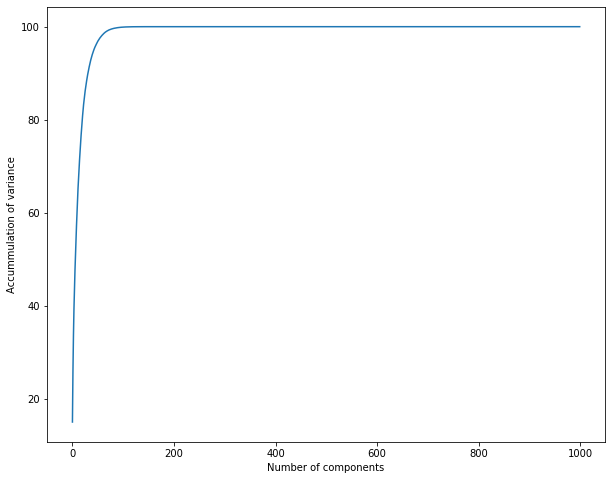

In [36]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA().fit(sc_cleaned_train)
x_train_pca = pca.transform(sc_cleaned_train)
x_val_pca = pca.transform(sc_cleaned_val)

# see when the cumulative explained variance ratios in percentage reaches threshold
cum_ex = list(np.cumsum(pca.explained_variance_ratio_*100))
print([i for i in range(len(cum_ex)) if cum_ex[i] >99])


# Cumulative explained plot to determine the number of components to use
fig2 = plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Accummulation of variance")
plt.show()
fig2.savefig('Cumulative explained variance with 36 filter bank.pdf')


In [ ]:
# fit pca with 68 components
pca = PCA(n_components=68).fit(sc_cleaned_train)
x_train_pca = pca.transform(sc_cleaned_train)
x_val_pca = pca.transform(sc_cleaned_val)

In [ ]:
clf_gab = svm.SVC(C=10, kernel='rbf', gamma='scale')
clf_gab.fit(x_train_pca, y_train)
train_pred = clf_gab.predict(x_train_pca)
val_pred = clf_gab.predict(x_val_pca)
print("classification accuracy on the training data: ", accuracy_score(y_train, train_pred))
print("classification accuracy on the validation data: ", accuracy_score(y_val, val_pred))

In [ ]:
# increase to 64 filters
theta = np.arange(0,np.pi,np.pi/4,)
frequency = np.arange(0.08,0.5,0.12)
bandwidth = np.arange(0.2,1,0.2)

train_coeff_real = []
val_coeff_real = []
for i in range(len(x_train)):
  train_coeff_real_i = []
  val_coeff_real_i = []
  a_train = x_train[i].reshape((28,28))
  a_val = x_val[i].reshape((28,28))
  image_train = cv2.resize(a_train, (14, 14))
  image_val = cv2.resize(a_val, (14,14))
  for f in frequency:
    for t in theta:
      for b in bandwidth:
        train_coeff_real_ , _ = gabor(image_train, frequency=f, theta=t,
        bandwidth=b)
        train_coeff_real_i.append(train_coeff_real_.reshape(196,))

        val_coeff_real_ , _ = gabor(image_val, frequency=f, theta=t,
        bandwidth=b)
        val_coeff_real_i.append(val_coeff_real_.reshape(196,))
  train_coeff_real.append(np.concatenate(tuple(train_coeff_real_i)))
  val_coeff_real.append(np.concatenate(tuple(val_coeff_real_i)))
train_coeff_real = np.array(train_coeff_real)
val_coeff_real = np.array(val_coeff_real)
# save the variables
np.savetxt('train_coeff_real_64.txt',train_coeff_real)
np.savetxt('val_coeff_real_64.txt',val_coeff_real)

In [28]:
# fill nan with 0
train_coeff_real = np.loadtxt('train_coeff_real_64.txt')
val_coeff_real = np.loadtxt('val_coeff_real_64.txt')
cleaned_train = np.nan_to_num(train_coeff_real)
cleaned_val = np.nan_to_num(val_coeff_real)

In [29]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cleaned_train)
sc_cleaned_train = np.nan_to_num(scaler.transform(cleaned_train))
sc_cleaned_val = np.nan_to_num(scaler.transform(cleaned_val))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1014: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: overflow encountered in square
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction ** 2 / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:80: RuntimeWarning: overflow encountered in square
  upper_bound = n_samples * eps * var + (n_samples * mean * eps) ** 2


[89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 

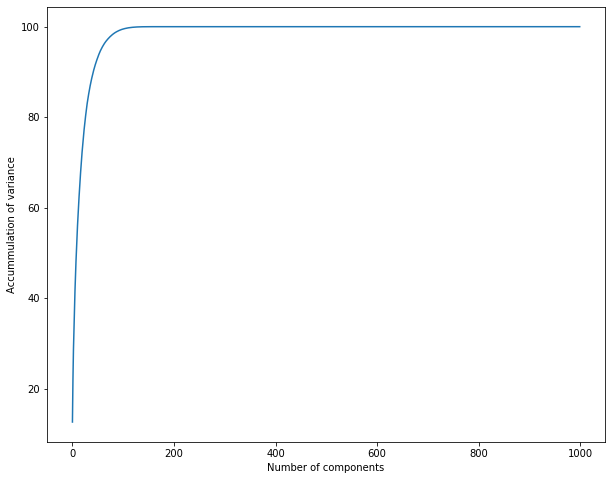

In [33]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA().fit(sc_cleaned_train)
x_train_pca = pca.transform(sc_cleaned_train)
x_val_pca = pca.transform(sc_cleaned_val)

# see when the cumulative explained variance ratios in percentage reaches threshold
cum_ex = list(np.cumsum(pca.explained_variance_ratio_*100))
print([i for i in range(len(cum_ex)) if cum_ex[i] >99])

# Cumulative explained plot to determine the number of components to use
fig3 = plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("Number of components")
plt.ylabel("Accummulation of variance")
plt.show()
fig3.savefig('Cumulative explained variance with 64 filter bank.pdf')


In [31]:
# PCA: fit pca with 89 components
pca = PCA(n_components=89).fit(sc_cleaned_train)
x_train_pca = pca.transform(sc_cleaned_train)
x_val_pca = pca.transform(sc_cleaned_val)

In [32]:
clf_gab = svm.SVC(C=10, kernel='rbf', gamma='scale')
clf_gab.fit(x_train_pca, y_train)
train_pred = clf_gab.predict(x_train_pca)
val_pred = clf_gab.predict(x_val_pca)
print("classification accuracy on the training data: ", accuracy_score(y_train, train_pred))
print("classification accuracy on the validation data: ", accuracy_score(y_val, val_pred))

classification accuracy on the training data:  1.0
classification accuracy on the validation data:  0.904
